# Convolutional Neural Networks

In [ ]:
A CNN is trained to classify images from CIFAR-10 databases

#  1.  Load CIFAR-10 Database 

In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 2. Visualize the First 24 Training Images

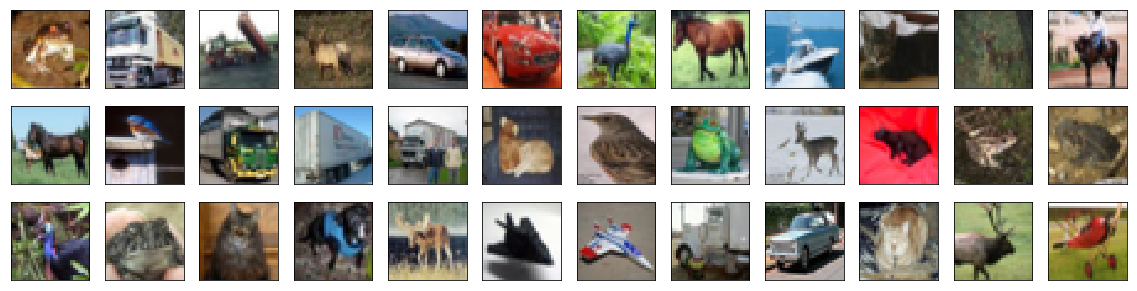

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (20, 5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

# 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [6]:
# rsscale [0, 255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255


fig = plt.figure(figsize = (20, 5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

# 4. Break Dataset into Training, Testing, and Validation Sets

In [8]:
from keras.utils import np_utils

#one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

#print number of training, validation and test images
print(x_train.shape[0], 'training images')
print(x_valid.shape[0], 'validation images')
print(x_test.shape[0], 'test images')

x_train shape: (45000, 32, 32, 3)
45000 training images
5000 validation images
10000 test images


# 5. Defining the model architecture 

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu',
                input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        416       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 32)        4128      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 4, 4, 64)          0         
__________

# 6.Compile the Model

In [15]:
#compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
             metrics=['accuracy'])

# 7.Train the Model

In [17]:
from keras.callbacks import ModelCheckpoint

#train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1,
                              save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
                validation_data=(x_valid, y_valid), callbacks=[checkpointer],
                verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 31s - loss: 1.5931 - acc: 0.4225 - val_loss: 1.2933 - val_acc: 0.5434

Epoch 00001: val_loss improved from inf to 1.29333, saving model to model.weights.best.hdf5
Epoch 2/100
 - 29s - loss: 1.2712 - acc: 0.5454 - val_loss: 1.1038 - val_acc: 0.5996

Epoch 00002: val_loss improved from 1.29333 to 1.10376, saving model to model.weights.best.hdf5
Epoch 3/100
 - 30s - loss: 1.1504 - acc: 0.5933 - val_loss: 1.0714 - val_acc: 0.6134

Epoch 00003: val_loss improved from 1.10376 to 1.07142, saving model to model.weights.best.hdf5
Epoch 4/100
 - 30s - loss: 1.0838 - acc: 0.6216 - val_loss: 0.9833 - val_acc: 0.6532

Epoch 00004: val_loss improved from 1.07142 to 0.98333, saving model to model.weights.best.hdf5
Epoch 5/100
 - 32s - loss: 1.0400 - acc: 0.6377 - val_loss: 0.9837 - val_acc: 0.6674

Epoch 00005: val_loss did not improve from 0.98333
Epoch 6/100
 - 31s - loss: 1.0255 - acc: 0.6470 - val_loss: 0.9980 - val_acc: 0.6616

Epoc

 - 31s - loss: 1.6937 - acc: 0.4131 - val_loss: 1.4648 - val_acc: 0.4824

Epoch 00059: val_loss did not improve from 0.98333
Epoch 60/100
 - 32s - loss: 1.7021 - acc: 0.4090 - val_loss: 1.5322 - val_acc: 0.4548

Epoch 00060: val_loss did not improve from 0.98333
Epoch 61/100
 - 32s - loss: 1.7157 - acc: 0.4026 - val_loss: 1.9279 - val_acc: 0.4180

Epoch 00061: val_loss did not improve from 0.98333
Epoch 62/100
 - 32s - loss: 1.7069 - acc: 0.4057 - val_loss: 1.4266 - val_acc: 0.4926

Epoch 00062: val_loss did not improve from 0.98333
Epoch 63/100
 - 32s - loss: 1.7187 - acc: 0.3956 - val_loss: 1.7192 - val_acc: 0.3826

Epoch 00063: val_loss did not improve from 0.98333
Epoch 64/100
 - 32s - loss: 1.7418 - acc: 0.3860 - val_loss: 1.5171 - val_acc: 0.4596

Epoch 00064: val_loss did not improve from 0.98333
Epoch 65/100
 - 32s - loss: 1.7450 - acc: 0.3874 - val_loss: 1.6166 - val_acc: 0.3888

Epoch 00065: val_loss did not improve from 0.98333
Epoch 66/100
 - 32s - loss: 1.7539 - acc: 0.383

# 8. Load the Model with the best Validation Accuracy

In [18]:
#load the weights that yeilded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

# 9. Calculate Classification Accuracy on Test Set 

In [19]:
#evaluate and print test accuracy
score= model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy: ', score[1])

Test Accuracy:  0.6505


# 10. Visualizing the Predictions

In [20]:
y_hat = model.predict(x_test)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 
                  'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

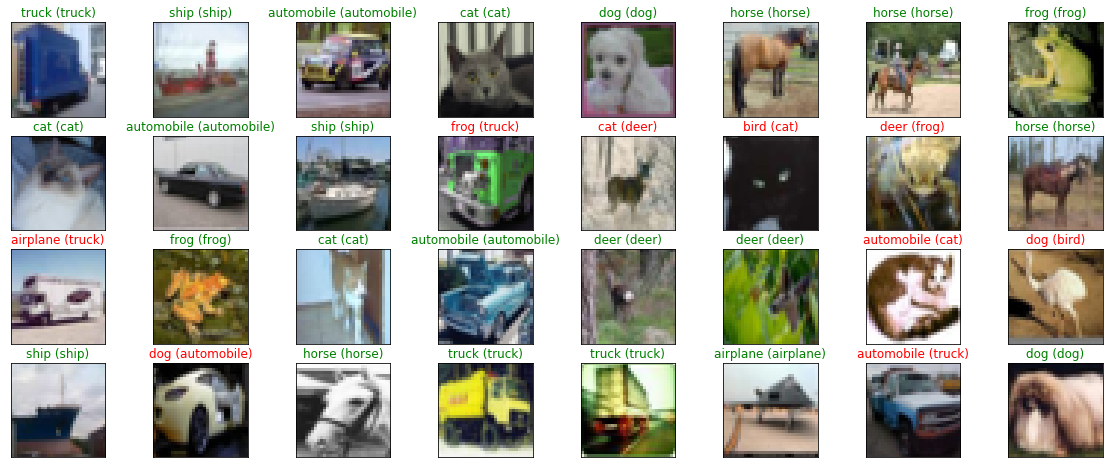

In [21]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
